In [16]:
# import the necessary libraries
import keras
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import os

import warnings
warnings.filterwarnings("ignore")

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.keras.utils.disable_interactive_logging()


import numpy as np
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import pandas as pd

In [22]:
X_sms_train = pd.read_csv('/kaggle/input/spam-dataset/train_data.csv')
X_sms_test = pd.read_csv('/kaggle/input/spam-dataset/test_data.csv')

X_email_train = pd.read_csv('/kaggle/input/spam-dataset/train_data_email.csv')
X_email_test = pd.read_csv('/kaggle/input/spam-dataset/test_data_email.csv')

y_train_sms = X_sms_train['y_train']
y_test_sms = X_sms_test['y_test']
y_train_email = X_email_train['y_train']
y_test_email = X_email_test['y_test']

X_sms_train.drop(['y_train'], axis=1, inplace=True)
X_sms_test.drop(['y_test'], axis=1, inplace=True)
X_email_train.drop(['y_train'], axis=1, inplace=True)
X_email_test.drop(['y_test'], axis=1, inplace=True)

In [23]:
max_words = 10000
maxlen = 100

df = pd.read_csv('/kaggle/input/email-spam-dataset/completeSpamAssassin.csv')

for i in range(len(df['Body'])):
    if type(df['Body'][i] != str):
        df['Body'][i] = str(df['Body'][i])
        

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Body'])


In [33]:
VOC_SIZE = len(tokenizer.word_index)+1


def create_lstm_model(units=100, dropout_rate=0.4, dense_units=20, dense_dropout_rate=0.5, lstm_activation='tanh', dense_activation='relu'):
    model = Sequential()
    model.add(Embedding(VOC_SIZE, 32, input_length=maxlen))
    model.add(LSTM(units, activation=lstm_activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation=dense_activation))
    model.add(Dropout(dense_dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model


sms_model = keras.models.load_model("/kaggle/input/spam-classification-models/sms_classification_lstm_model.keras")
email_model = keras.models.load_model("/kaggle/input/spam-classification-models/model_email.keras")

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

Test Score:95.03%


array([[366,  19],
       [ 11, 208]])

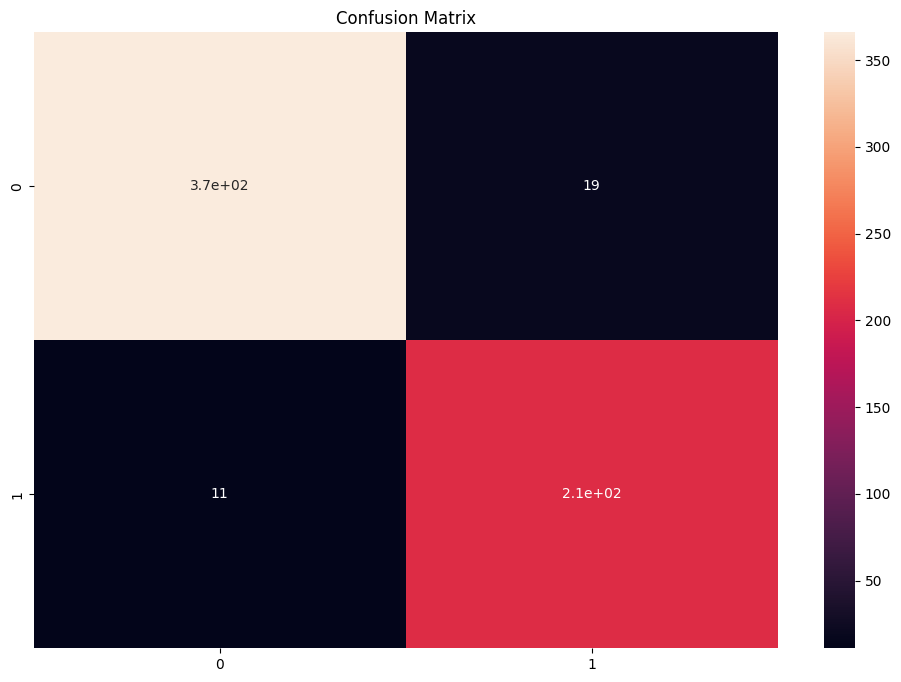

In [47]:
y_pred=email_model.predict(X_email_test)
y_pred=(y_pred>0.5)

score=accuracy_score(y_test_email,y_pred)
print("Test Score:{:.2f}%".format(score*100))

cm=confusion_matrix(y_test_email,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

Test Score:39.16%


array([[192, 297],
       [ 51,  32]])

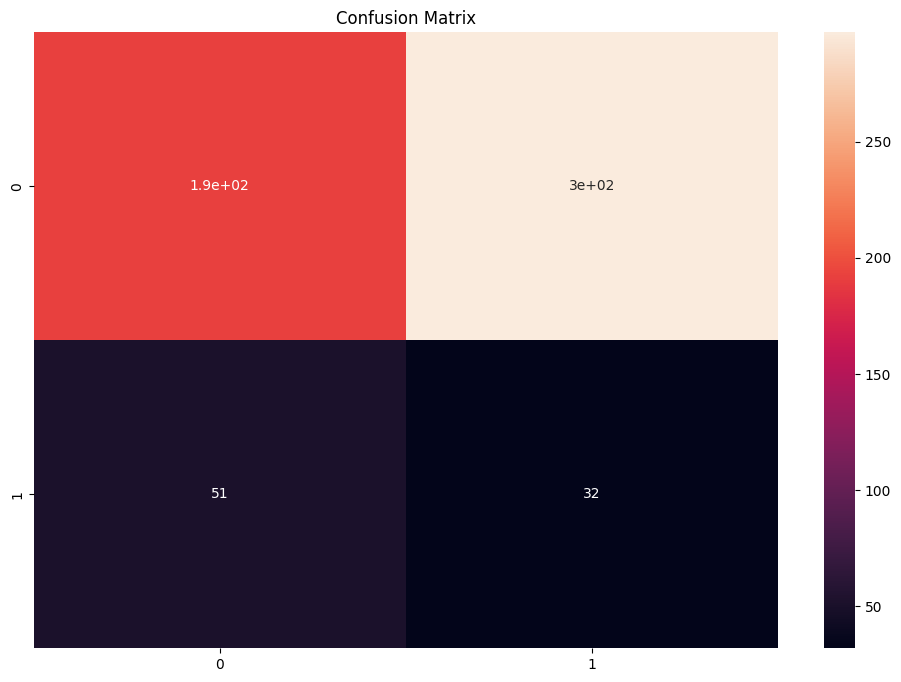

In [49]:
y_pred=email_model.predict(X_sms_test)
y_pred=(y_pred>0.5)

score=accuracy_score(y_test_sms,y_pred)
print("Test Score:{:.2f}%".format(score*100))

cm=confusion_matrix(y_test_sms,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

Test Score:48.01%


array([[213, 172],
       [142,  77]])

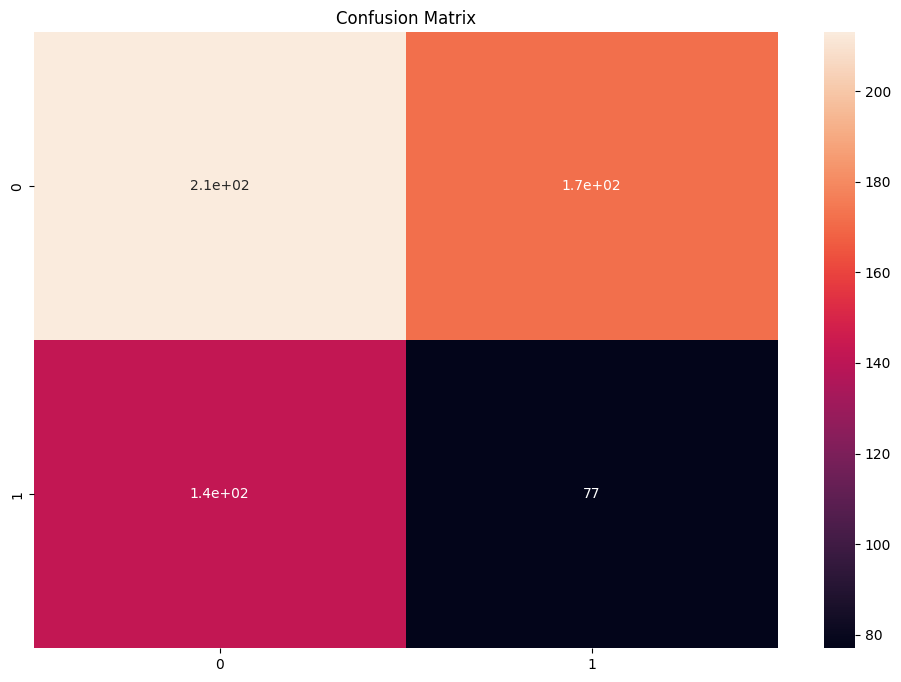

In [50]:
y_pred=sms_model.predict(X_email_test)
y_pred=(y_pred>0.5)

score=accuracy_score(y_test_email,y_pred)
print("Test Score:{:.2f}%".format(score*100))

cm=confusion_matrix(y_test_email,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

Test Score:99.48%


array([[488,   1],
       [  2,  81]])

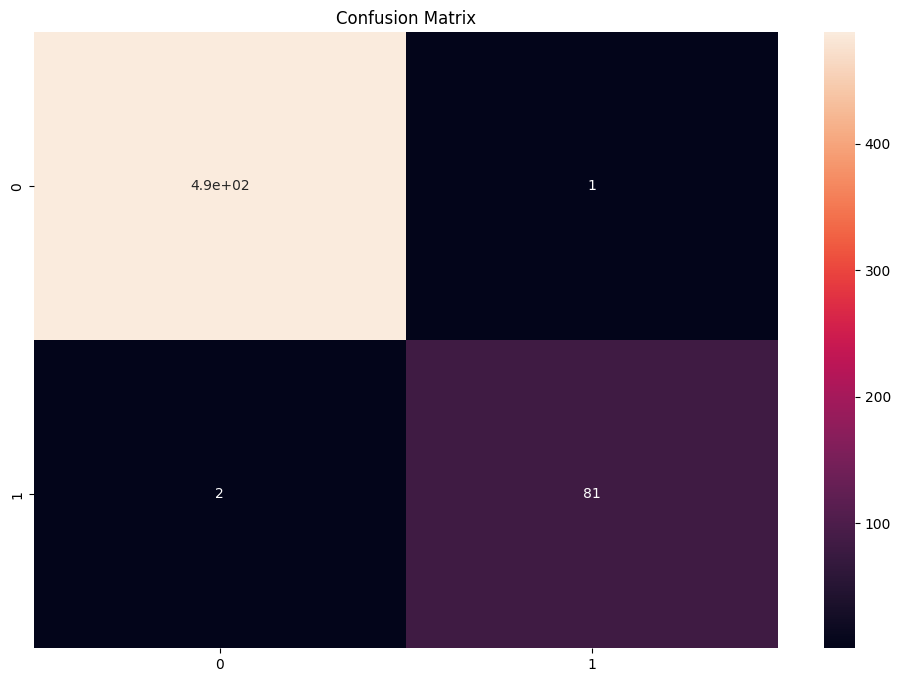

In [51]:
y_pred=sms_model.predict(X_sms_test)
y_pred=(y_pred>0.5)

score=accuracy_score(y_test_sms,y_pred)
print("Test Score:{:.2f}%".format(score*100))

cm=confusion_matrix(y_test_sms,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm